In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time
#Load the diabetes dataset 
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

THough we do not have any categorical data types, let us perform an operation to drop categorical values adhering to standard procedures.

In [25]:
#Drop all categorical values 
categorical_columns = df.select_dtypes(include = ['object']).columns
df = df.drop(columns = categorical_columns)

In [26]:
#Checking for missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
#Creating feature matrix and label vector 
X = df.drop(columns = ['Outcome']).values
y = df['Outcome'].values

In [28]:
# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test 



In [29]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
#Scaling the training and testing data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [30]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    Arguments: 
    point1 : np.ndarray
             The first point as a numpy array 
    point2 : np.ndarray 
    The second point as a numpy array 
    Returns: 
    float 
    The Euclidean distance between the two points.
    Raises: 
    ValueError: If the input points do not have the same dimensionality
    """

    #check if the points are of the same dimension
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimension to calculate Euclidean distance.")
    
    #Calculate the Euclidean distance 
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

In [31]:
#Test case for the function
try: 
    #Define two points
    point1 = np.array([0,4])
    point2 = np.array([0,0])
    #Calculate the distance 
    result = euclidean_distance(point1, point2)
    #Check if the result matches the expected value 
    expected_result = 4.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


In [32]:
#Function for KNN prediction for a single query
def knn_predict_single(query,X_train, y_train, k =3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm
    Arguments: 
    query : np.ndarray 
         The query point for which the prediction is to be made.
    X_train : np.ndarray 
          The training feature matrix
    y_train : np.ndarray
          The training labels.
    k : int, optional 
           The number of nearest neigbors to consider (default is 3).
    Returns: 
    int 
       The predicted class label for the query.
    """

    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [33]:
#Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k ):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.
    Arguments:
    X_test : np.ndarray
    The test feature matrix.
    X_train : np.ndarray
    The training feature matrix.
    y_train : np.ndarray
    The training labels.
    k : int, optional
    The number of nearest neighbors to consider (default is 3).
    Returns:
    np.ndarray
    An array of predicted class labels for the test samples.
    """

    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [34]:
#Test case for KNN On the diabetes dataset 
try: 
    #Define the test set for the test case 
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]
    #Make predictions
    predictions = knn_predict(X_test_sample, X_train, y_train, k = 3)
    #Print the results 
    print("Predictions: ", predictions)
    print("Actual labels: ", y_test_sample)
    #Check if predictions match expected format 
    assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
    print("Test case passed successfully")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occured: {e}")
    

Predictions:  [0 1 0 1 1]
Actual labels:  [0 0 0 0 0]
Test case passed successfully


In [35]:
#Function to compute accuracy of predictions 
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.
    Arguments:
    y_true : np.ndarray ; The true labels.
    y_pred : np.ndarray; The predicted labels.
    Returns:
    float : The accuracy as a percentage (0 to 100).
    """

    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy


In [36]:
#Perform prediction on the entire test set 
try: 
    predictions = knn_predict(X_test, X_train, y_train, k = 3)
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occured during prediction or accuracy computation: {e}")
    

Accuracy of the KNN model on the test set: 67.39%


In [48]:
#Function to test KNN on different values of k and plot the accuracies
import matplotlib.pyplot as plt 
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.
    Arguments:
    X_train : np.ndarray
    The training feature matrix.
    y_train : np.ndarray
    The training labels.
    X_test : np.ndarray
    The test feature matrix.
    y_test : np.ndarray
    The test labels.
    k_values : list of int
    A list of k values to experiment with.
    Returns:
    dict
    A dictionary with k values as keys and their corresponding accuracies as values.
   """
    accuracies = {}
    individual_time = []
    for k in k_values:
        print(k)
        start_time = time.time()
        #Make predictions using the current value of k 
        predictions = knn_predict(X_test, X_train, y_train, k = k)
        print(predictions.shape, y_test.shape)
        
        # Compute the accuracy
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy  for k={k}: {accuracy:.2f}%")
        end_time = time.time()
        print(f"Time taken for k={k}: {end_time-start_time:.2f} seconds")
        individual_time.append(end_time-start_time)
        
        # Plot the accuracies
    # plt.figure(figsize=(10, 5))
    # plt.plot(k_values, list(accuracies.values()), marker='o', label = "K vs Accuracy")
    # plt.plot(k_values, individual_time, linestyle='--', label = "K vs Time")
    # plt.xlabel("k (Number of Neighbors)")
    # plt.ylabel("Accuracy (%)")
    # plt.title("Accuracy of KNN with Different Values of k")
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    fig.tight_layout(pad=3.0)  # Add space between subplots
    
    # First subplot: K vs Accuracy
    ax1.plot(k_values, list(accuracies.values()), marker='o', color='blue')
    ax1.set_xlabel("k (Number of Neighbors)")
    ax1.set_ylabel("Accuracy (%)")
    ax1.set_title("K vs Accuracy")
    ax1.grid(True)
    
    # Second subplot: K vs Time
    ax2.plot(k_values, individual_time, marker='o', color='red', linestyle='--')
    ax2.set_xlabel("k (Number of Neighbors)")
    ax2.set_ylabel("Time (seconds)")
    ax2.set_title("K vs Time")
    ax2.grid(True)
    
    plt.show()
    return accuracies



1
(230,) (230,)
Accuracy  for k=1: 68.70%
Time taken for k=1: 2.31 seconds
2
(230,) (230,)
Accuracy  for k=2: 72.61%
Time taken for k=2: 1.83 seconds
3
(230,) (230,)
Accuracy  for k=3: 67.39%
Time taken for k=3: 1.81 seconds
4
(230,) (230,)
Accuracy  for k=4: 72.17%
Time taken for k=4: 2.37 seconds
5
(230,) (230,)
Accuracy  for k=5: 68.70%
Time taken for k=5: 2.10 seconds
6
(230,) (230,)
Accuracy  for k=6: 70.00%
Time taken for k=6: 2.57 seconds
7
(230,) (230,)
Accuracy  for k=7: 69.13%
Time taken for k=7: 2.17 seconds
8
(230,) (230,)
Accuracy  for k=8: 71.30%
Time taken for k=8: 2.65 seconds
9
(230,) (230,)
Accuracy  for k=9: 70.00%
Time taken for k=9: 2.16 seconds
10
(230,) (230,)
Accuracy  for k=10: 71.74%
Time taken for k=10: 2.75 seconds
11
(230,) (230,)
Accuracy  for k=11: 73.04%
Time taken for k=11: 2.21 seconds
12
(230,) (230,)
Accuracy  for k=12: 73.91%
Time taken for k=12: 2.18 seconds
13
(230,) (230,)
Accuracy  for k=13: 74.35%
Time taken for k=13: 2.23 seconds
14
(230,) (23

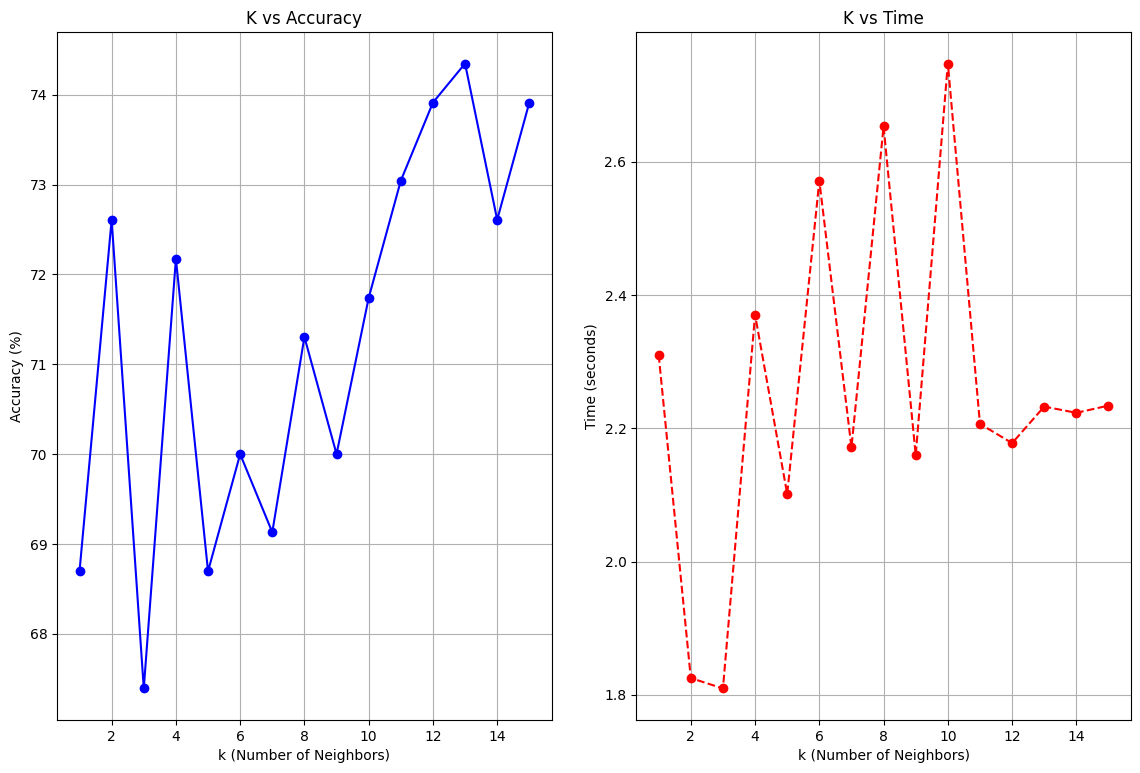

Experiment completed. Check the plot for the accuracy trend.


In [49]:
# Define the range of k values to experiment with
k_values = range(1, 16) # You can adjust this range as needed
# Run the experiment
try:
   accuracies = experiment_knn_k_values(X_train, y_train,X_test, y_test, k_values)
   print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
   print(f"An unexpected error occurred during the experiment: {e}")

1
(230,) (230,)
Accuracy  for k=1: 63.48%
Time taken for k=1: 2.59 seconds
2
(230,) (230,)
Accuracy  for k=2: 66.09%
Time taken for k=2: 1.85 seconds
3
(230,) (230,)
Accuracy  for k=3: 70.87%
Time taken for k=3: 1.97 seconds
4
(230,) (230,)
Accuracy  for k=4: 68.70%
Time taken for k=4: 1.79 seconds
5
(230,) (230,)
Accuracy  for k=5: 70.00%
Time taken for k=5: 1.92 seconds
6
(230,) (230,)
Accuracy  for k=6: 69.13%
Time taken for k=6: 2.27 seconds
7
(230,) (230,)
Accuracy  for k=7: 69.57%
Time taken for k=7: 2.01 seconds
8
(230,) (230,)
Accuracy  for k=8: 68.70%
Time taken for k=8: 1.95 seconds
9
(230,) (230,)
Accuracy  for k=9: 69.57%
Time taken for k=9: 2.16 seconds
10
(230,) (230,)
Accuracy  for k=10: 69.57%
Time taken for k=10: 1.98 seconds
11
(230,) (230,)
Accuracy  for k=11: 70.87%
Time taken for k=11: 2.52 seconds
12
(230,) (230,)
Accuracy  for k=12: 72.17%
Time taken for k=12: 2.18 seconds
13
(230,) (230,)
Accuracy  for k=13: 71.30%
Time taken for k=13: 2.50 seconds
14
(230,) (23

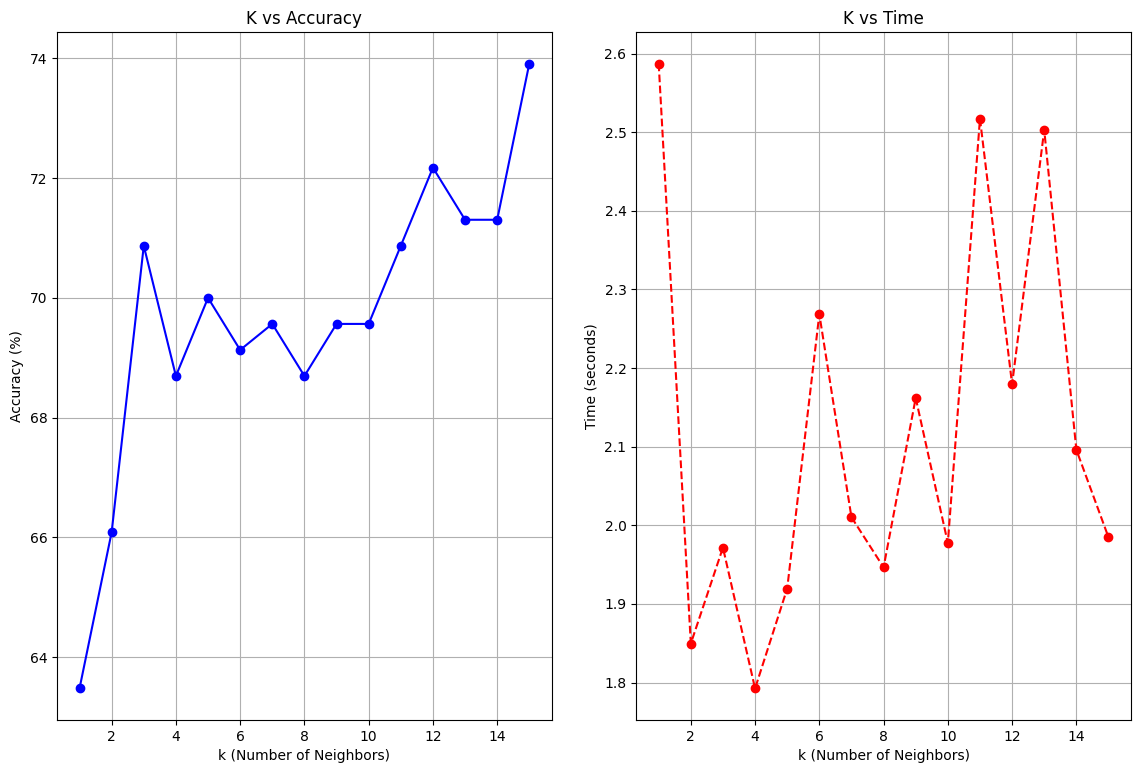

Experiment completed. Check the plot for the accuracy trend.


In [50]:
k_values = range(1, 16) # You can adjust this range as needed
# Run the experiment
try:
   accuracies = experiment_knn_k_values(X_train_scaled, y_train,X_test_scaled, y_test, k_values)
   print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
   print(f"An unexpected error occurred during the experiment: {e}")

Impact of k on Accuracy:

Unscaled Dataset (Image 1):

Accuracy ranges from ~68% to ~74%
Shows high variability with changing k values
Peak accuracy occurs at k=14 (approximately 74%)
Shows multiple local maxima at k=2, k=4, and k=14

Scaled Dataset (Image 2):

Accuracy ranges from ~64% to ~74%
More stable trend with increasing k values
Highest accuracy occurs at k=15 (approximately 74%)
Shows a generally increasing trend with k


Impact of k on Computational Time:

Unscaled Dataset (Image 1):

Execution time varies between 1.8 to 2.7 seconds
Shows high variability in computation time
Peaks in computation time at k=6, k=8, and k=10

Scaled Dataset (Image 2):

Execution time ranges from 1.8 to 2.6 seconds
More consistent pattern in computation time
Notable spikes at k=2 and k=12-13


Optimal k Selection:

For the Scaled Dataset (preferred choice):

Optimal k appears to be 15 because:

It achieves the highest accuracy (~74%)
Computational time at this k is relatively moderate
The trend suggests more stability in predictions



Trade-offs to consider:

Lower k values (k=2 to k=6) run faster but have lower accuracy
Middle range k values (k=7 to k=11) show moderate performance but with some instability
Higher k values (k=12 to k=15) show better accuracy but with slightly increased computational cost


Key Observations:


Scaling the dataset has improved the stability of accuracy trends
The scaled dataset shows a clearer relationship between k and accuracy
Both datasets achieve similar maximum accuracy, but the scaled version reaches it with more consistency
Computational time patterns are more predictable in the scaled dataset

Recommendation:
Based on this analysis, I would recommend using k=15 with the scaled dataset because:

It provides the highest accuracy
The computational cost is reasonable
The trend leading to this k value is more stable, suggesting better generalization
The scaled dataset shows more consistent behavior overall, making the model more reliable

#Problem 4
Challenges with Large Datasets:

Computational Cost: O(n*d) for each prediction, where n=samples and d=dimensions
Memory Usage: Entire training set must be stored
Curse of Dimensionality: Performance degrades in high dimensions

Solutions & Improvements:

Speed Optimization:


Ball Tree/KD-Tree data structures
Locality Sensitive Hashing (LSH)
Approximate Nearest Neighbors (ANN)


Dimensionality Reduction:


PCA for linear reduction
t-SNE for non-linear reduction
Feature selection


Data Management:


Data sampling for large datasets
Parallel processing
GPU acceleration

These improvements can significantly reduce computation time while maintaining acceptable accuracy levels.